In [1]:
import rasterio as rio
from rasterio.mask import mask
import os, sys
import numpy as np
import geopandas as gpd
import glob
from matplotlib import pyplot as plt

In [2]:
TC_brightness_files = sorted(glob.glob('./output/20*_TCBright.tif'))
TC_wetness_files = sorted(glob.glob('./output/20*_TCWet.tif'))
TC_greenness_files = sorted(glob.glob('./output/20*_TCGreen.tif'))

cluster_imfile = './output/TCTrends_gausMix_5cl.tif'

In [3]:
## read in shapefile
gdf = gpd.read_file('./USGS/akecoregions_intmontane.shp')



In [9]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

features=getFeatures(gdf)
with rio.open(cluster_imfile) as src:
    
    arr,_ = mask(src, shapes=features, crop=True, nodata=-9999)
    print(arr.max(), arr.min())
    arr = np.ma.masked_equal(arr, -9999)

4 -9999


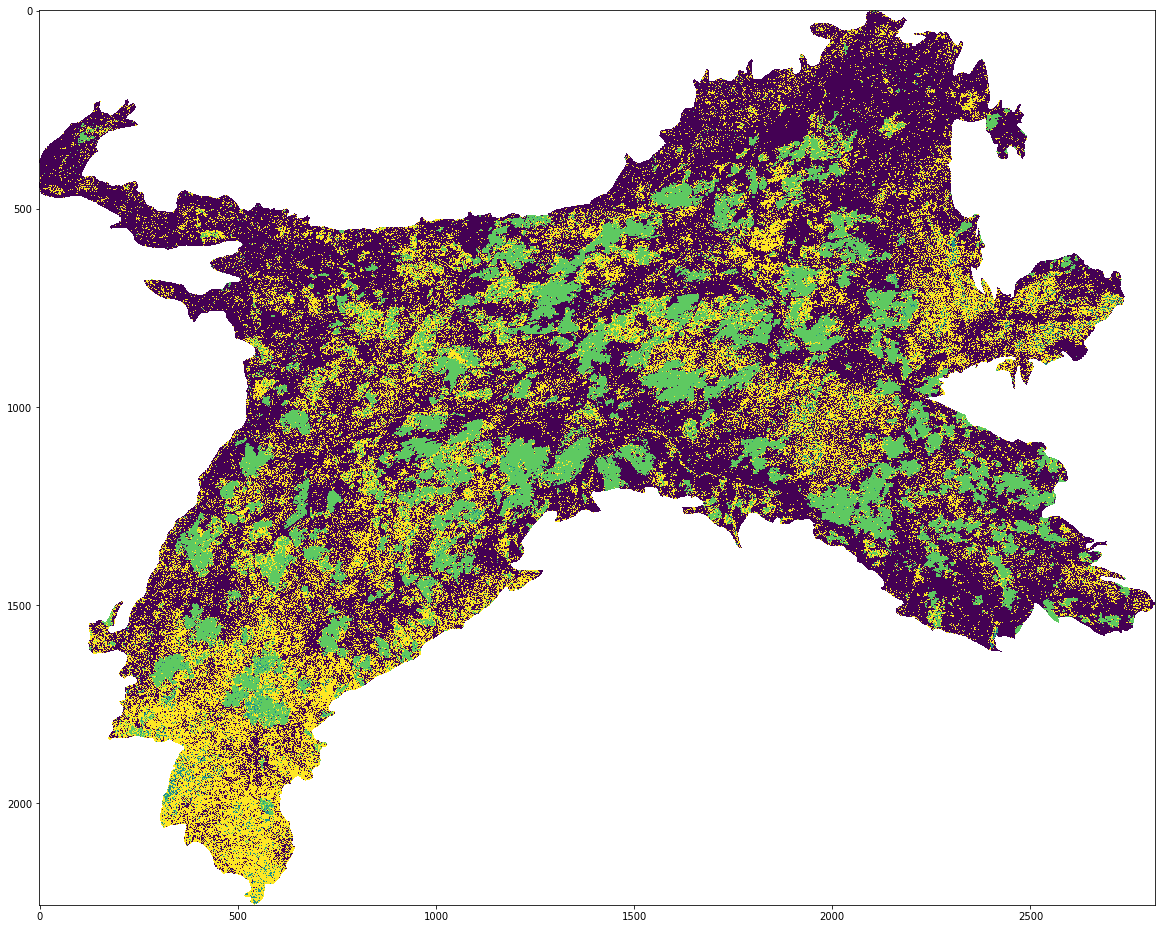

In [11]:
plt.figure(figsize=(20,20))
plt.imshow(arr[0])

In [12]:
## check the shapes of all data to make sure they are the same if they are masked
with rio.open(cluster_imfile) as src:
    
    cluster_arr,_ = mask(src, shapes=features, crop=True, nodata=-9999)
    cluster_arr = np.ma.masked_equal(arr, -9999)
    print(arr.shape)

print('\nchecking TC brightness')
for ras in TC_brightness_files:
    with rio.open(ras) as src:
    
        arr,_ = mask(src, shapes=features, crop=True, nodata=-9999)
        arr = np.ma.masked_equal(arr, -9999)
        print(arr.shape)
        
print('\nchecking TC wetness')
for ras in TC_wetness_files:
    with rio.open(ras) as src:
    
        arr,_ = mask(src, shapes=features, crop=True, nodata=-9999)
        arr = np.ma.masked_equal(arr, -9999)
        print(arr.shape)
        
print('\nchecking TC greenness')
for ras in TC_greenness_files:
    with rio.open(ras) as src:
    
        arr,_ = mask(src, shapes=features, crop=True, nodata=-9999)
        arr = np.ma.masked_equal(arr, -9999)
        print(arr.shape)

(1, 2257, 2816)

checking TC brightness
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)

checking TC wetness
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)

checking TC greenness
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)
(1, 2257, 2816)


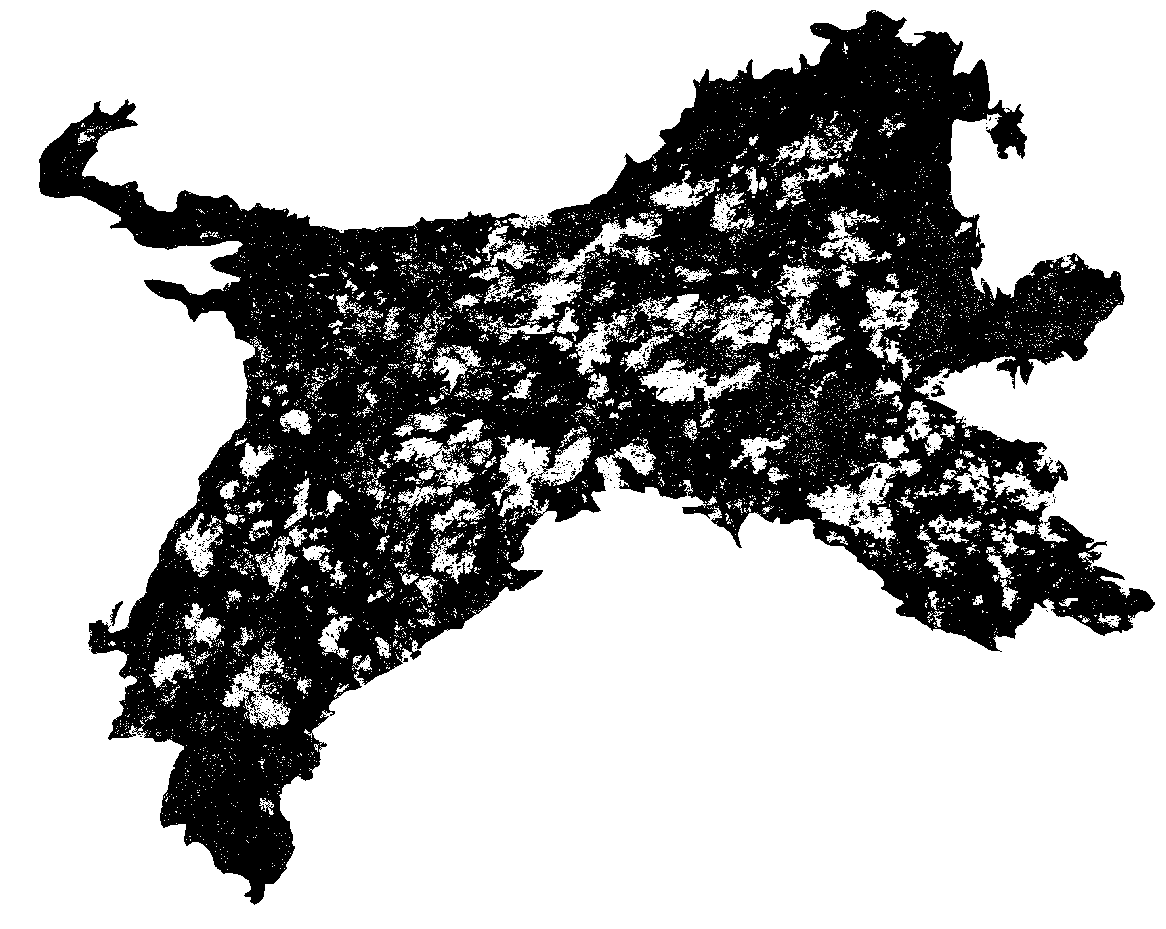

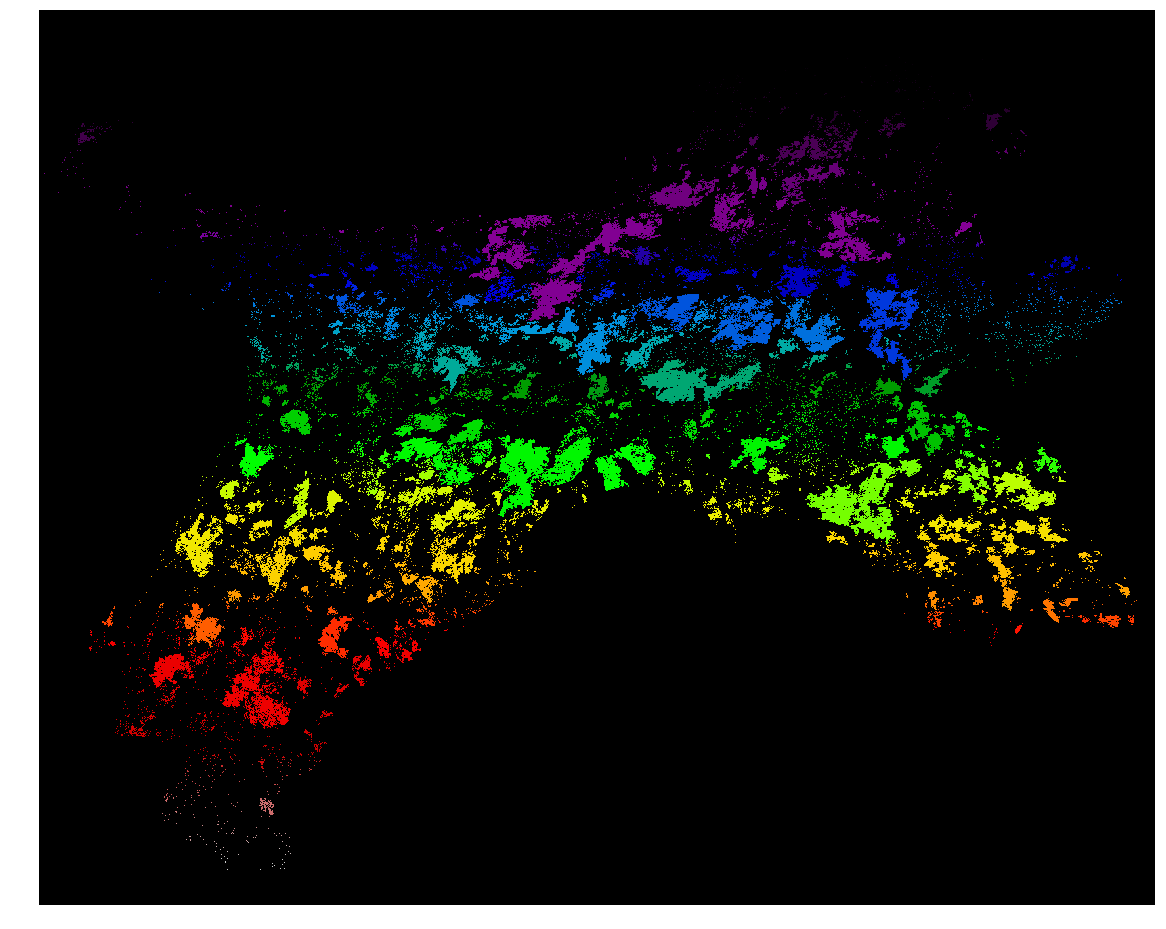

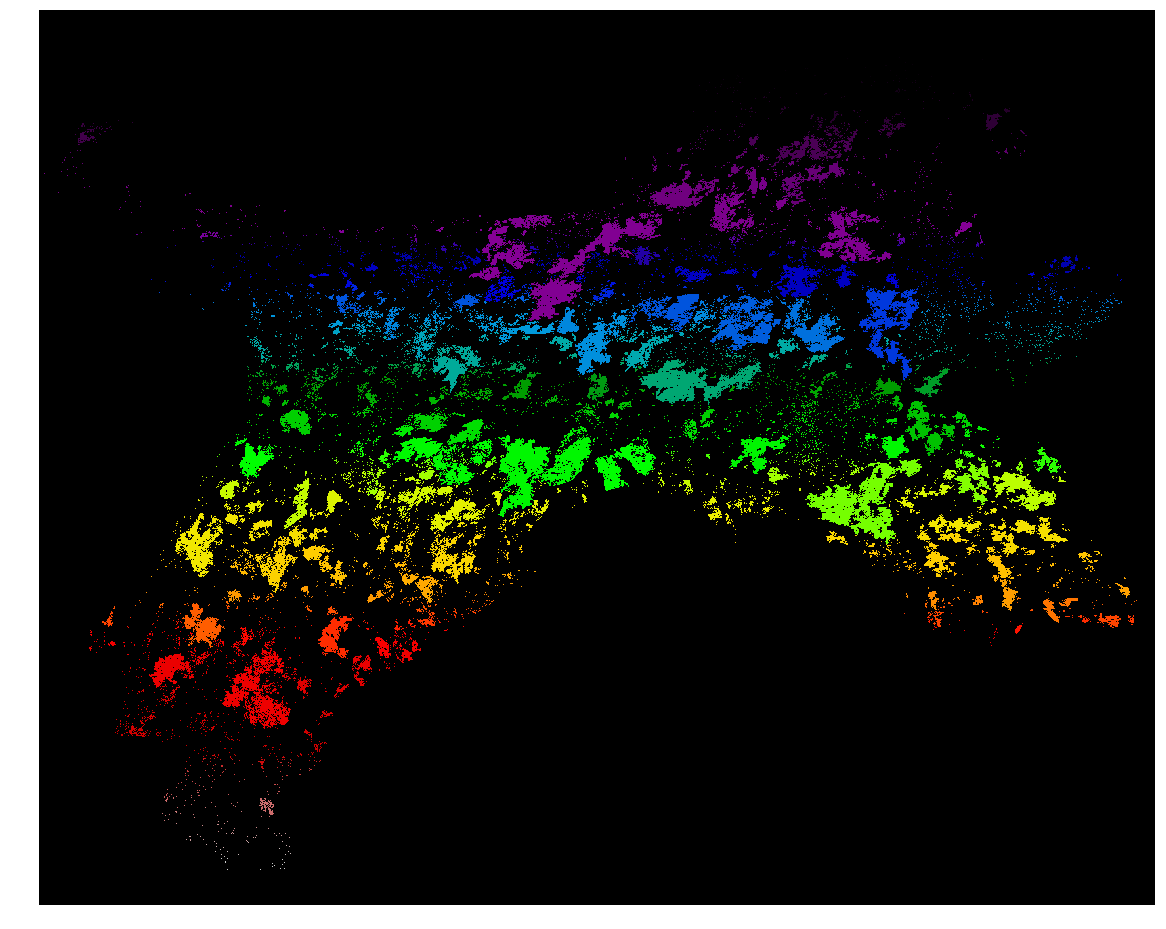

In [16]:
## check for components of class 3
from skimage import measure
from skimage import filters

cluster_num = 3
blobs = (cluster_arr == cluster_num).squeeze()
all_labels = measure.label(blobs)
blobs_labels = measure.label(blobs, background=0)

plt.figure(figsize=(20, 20))
plt.imshow(blobs, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(20, 20))
plt.imshow(all_labels, cmap='nipy_spectral')
plt.axis('off')
plt.show()

plt.figure(figsize=(20, 20))
plt.imshow(blobs_labels, cmap='nipy_spectral')
plt.axis('off')
plt.show()

In [14]:
blobs.shape

(1, 2257, 2816)

In [7]:
#!pip install --upgrade git+https://github.com/earthlab/earthpy.git
import earthpy as et

In [ ]:
## crop the image and write a stack for each TC band